In [1]:
 from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np

In [2]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [4]:
 from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [6]:
tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:
X.shape, y.shape

((150, 2), (150,))

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

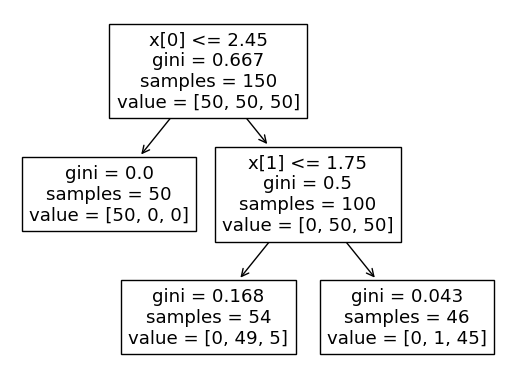

In [8]:
tree.plot_tree(tree_clf) 

Text(3.2, 1.8, 'Depth=1')

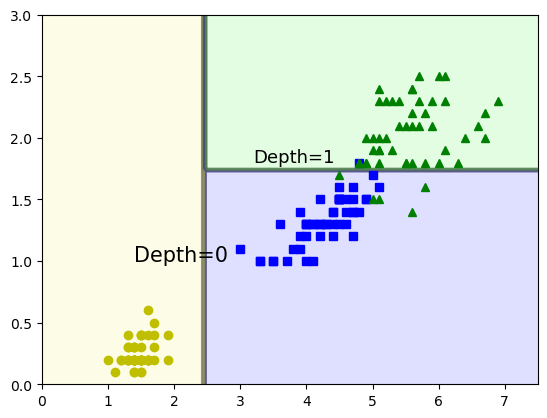

In [9]:
plot_decision_boundary(tree_clf, X, y)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)

In [10]:
tree_clf.get_depth()

2

In [12]:
 from sklearn.datasets import make_moons

In [13]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53) 

In [14]:
deep_tree_clf1 = tree.DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = tree.DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

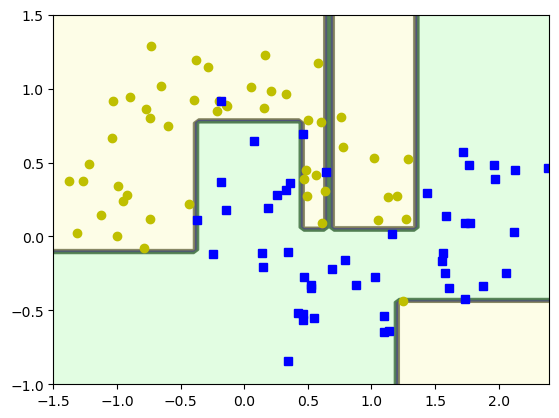

In [15]:
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5]) 

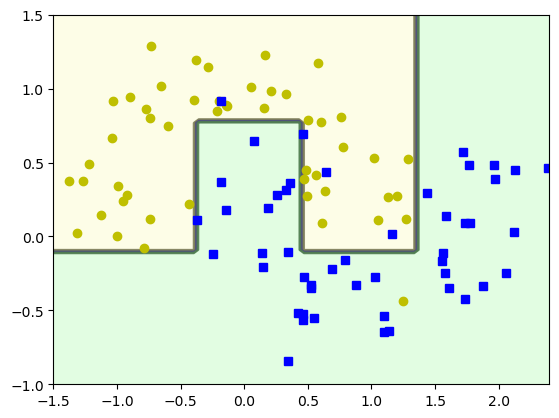

In [16]:
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5]) 

In [17]:
deep_tree_clf1.get_depth(), deep_tree_clf2.get_depth()

(7, 6)

[Text(0.35714285714285715, 0.9375, 'x[1] <= -0.092\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.14285714285714285, 0.8125, 'x[0] <= 1.195\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.07142857142857142, 0.6875, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.21428571428571427, 0.6875, 'x[1] <= -0.43\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.14285714285714285, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.5625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5714285714285714, 0.8125, 'x[0] <= 1.36\ngini = 0.441\nsamples = 73\nvalue = [49, 24]'),
 Text(0.5, 0.6875, 'x[0] <= -0.379\ngini = 0.316\nsamples = 61\nvalue = [49, 12]'),
 Text(0.42857142857142855, 0.5625, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.5714285714285714, 0.5625, 'x[0] <= 0.466\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.42857142857142855, 0.4375, 'x[1] <= 0.769\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.3571

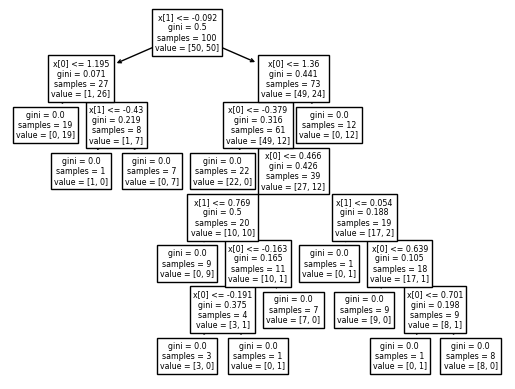

In [18]:
tree.plot_tree(deep_tree_clf1) 